In [52]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt

In [53]:
DIMX_POS = 10 # mm
DIMY_POS = 50 # mm
DIMZ_POS = 50 # mm

SPACING = (10, 50, 50) # mm
DIMX_VOX = int(DIMX_POS/SPACING[0])
DIMY_VOX = int(DIMY_POS/SPACING[1])
DIMZ_VOX = int(DIMZ_POS/SPACING[2])

SIZE_OF_MATERIAL_ID = 8 # bytes
SIZE_OF_DOSE = 64 # bytes
print(f"Voxel dimensions: {DIMX_VOX} x {DIMY_VOX} x {DIMZ_VOX}, spacing: {SPACING} mm, total voxels: {DIMX_VOX*DIMY_VOX*DIMZ_VOX}, total MB: {(DIMX_VOX*DIMY_VOX*DIMZ_VOX*(SIZE_OF_MATERIAL_ID + SIZE_OF_DOSE))/8e+6}")

Voxel dimensions: 1 x 1 x 1, spacing: (10, 50, 50) mm, total voxels: 1, total MB: 9e-06


In [54]:
# specify materialID's
pb = 130
air = 3
scin = 35

In [55]:
# create empty 3D array
voxels = np.zeros((DIMX_VOX, DIMY_VOX, DIMZ_VOX), dtype=np.uint8)

In [56]:
# fill all voxels with mat
voxels[:,:,:] = scin

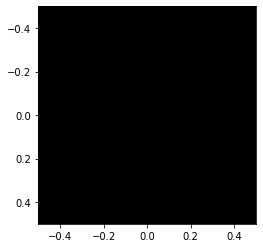

In [57]:
# plot slice of body
plt.imshow(voxels[:,:,0], cmap='gray')

In [58]:
affine = np.diag((SPACING[0], SPACING[1], SPACING[2], 1))

In [59]:
# create header
header = nib.Nifti1Header()
header.set_xyzt_units('mm', 'sec')
header.set_data_dtype(np.uint8)
header.set_dim_info(0, 1, 2)
header.set_data_shape((DIMX_VOX, DIMY_VOX, DIMZ_VOX))
header.set_zooms(SPACING)
header.set_xyzt_units('mm', 'sec')
header.set_qform(affine, 1)
header.set_sform(affine, 1) 

In [60]:
# create image
img = nib.Nifti1Image(voxels, affine, header)

In [61]:
print(img.header)
# save image
nib.save(img, '../data/voxels/scintillator.nii.gz')

<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b''
dim_info        : 57
dim             : [3 1 1 1 1 1 1 1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : uint8
bitpix          : 8
slice_start     : 0
pixdim          : [ 1. 10. 50. 50.  1.  1.  1.  1.]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 10
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b''
aux_file        : b''
qform_code      : scanner
sform_code      : scanner
quatern_b       : 0.0
quatern_c       : 0.0
quatern_d       : 0.0
qoffset_x       : 0.0
qoffset_y       : 0.0
qoffset_z       : 0.0
srow_x          : [10.  0.  0.  0.]
srow_y          : [ 0. 50.  

In [62]:
data = img.get_fdata()
data.shape

(1, 1, 1)

In [63]:
header = img.header
header.get_zooms()

(10.0, 50.0, 50.0)

In [64]:
header.get_xyzt_units()

('mm', 'sec')

In [65]:
# load image from file
img = nib.load('../data/voxels/lead_block.nii.gz')
header = img.header
header.get_data_shape()
header.get_zooms()

(82.0, 25.0, 82.0)